In [1]:
import calibration_kitti as calib
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

%matplotlib inline

(1224, 370)


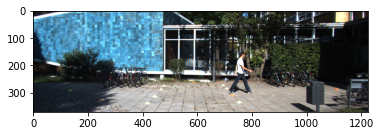

In [2]:
img_path = 'kitti/image_2/000000.png'
calib_path = 'kitti/calib/000000.txt'
velodyne_path = 'kitti/velodyne/000000.bin'

kitti_calib = calib.Calibration(calib_path)

pil_im = Image.open(img_path, 'r')
imshow(np.asarray(pil_im))

print(pil_im.size)

lidar = np.fromfile(str(velodyne_path), dtype=np.float32).reshape(-1, 4)

In [3]:
lidar_rect = kitti_calib.lidar_to_rect(lidar[:, 0:3])
pts_img, pts_rect_depth = kitti_calib.rect_to_img(lidar_rect)

print(pts_img.shape)
print(pts_rect_depth.shape)

(115384, 2)
(115384,)


In [4]:
def get_fov_flag(pts_rect, img_shape, calib):
        """
        Args:
            pts_rect:
            img_shape:
            calib:

        Returns:

        """
        pts_img, pts_rect_depth = calib.rect_to_img(pts_rect)
        val_flag_1 = np.logical_and(pts_img[:, 0] >= 0, pts_img[:, 0] < img_shape[1])
        val_flag_2 = np.logical_and(pts_img[:, 1] >= 0, pts_img[:, 1] < img_shape[0])
        val_flag_merge = np.logical_and(val_flag_1, val_flag_2)
        pts_valid_flag = np.logical_and(val_flag_merge, pts_rect_depth >= 0)

        return pts_valid_flag

In [5]:
image_shape = [pil_im.size[1], pil_im.size[0]]
pts_fov_flag = get_fov_flag(lidar_rect, image_shape, kitti_calib)
pts_fov = lidar_rect[pts_fov_flag]
pts_img_fov = pts_img[pts_fov_flag]
pts_rect_depth_fov = pts_rect_depth[pts_fov_flag]

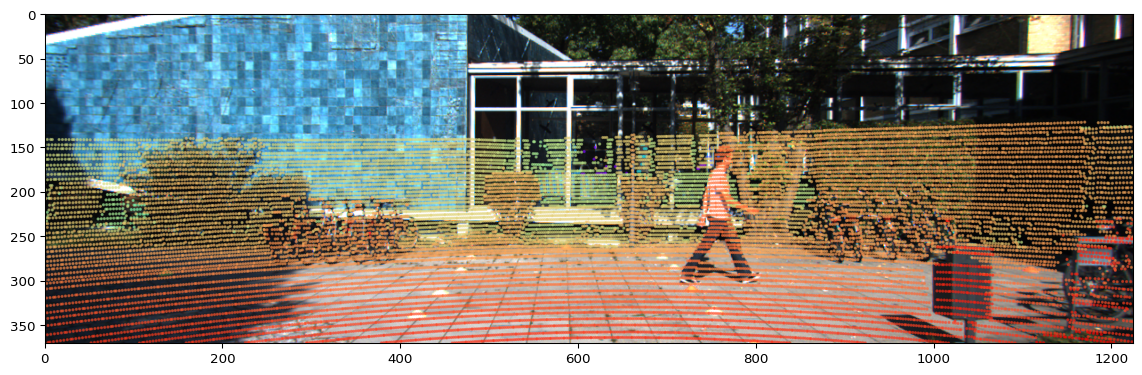

In [6]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=96, tight_layout=True)
plt.axis([0, pil_im.size[0], pil_im.size[1], 0])
plt.imshow(np.asarray(pil_im))
u = pts_img_fov[:, 0]
v = pts_img_fov[:, 1]
z = pts_rect_depth_fov ** 0.4 # use exponent 0.4 to rescale the depth value for visualization only
plt.scatter([u], [v], c=[z], cmap='rainbow_r', alpha=0.5, s=2)
plt.show()